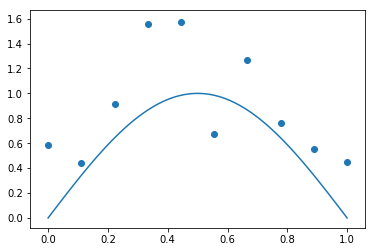

In [8]:
## Code from last time, my hope is simply to improve what I've already got!

import matplotlib.pyplot as plt
import numpy as np

def getPoints(N):
    pts=[]
    for i in range(N):
        pts.append(np.sin(np.pi*i/N)+np.random.normal()/3) ## scaled back the noise some
    return pts

def getError(y_pts,h):
    if(len(y_pts)!=len(h)):
        print("Que? Chto? Shen ma?")
        return(-1)
    return(sum((h-y_pts)**2))

np.random.seed(0) ## Good practice

x=np.linspace(0,1,100) ## Underlying data that is sampled
y=np.sin(np.pi*x)
y_pts = getPoints(10) ## Samples plus a gaussian error term
x_pts=np.linspace(0,1,10)
plt.scatter(x_pts,y_pts,marker='o')
plt.plot(x,y)
plt.show()

In [9]:
## This is my attrociously slow running code from last time
def fitIt(x_pts,y_pts,degree,dw,alpha):
    w = [0 for x in range(degree)]
    while(True):
        hf = np.poly1d(w) ## Haha no reinventing the wheel here!
        h=hf(x_pts)
        e0=getError(y_pts,h)
        de=[]
        for i in range(degree):
            w[i] = w[i] + dw
            hf = np.poly1d(w)
            h=hf(x_pts)
            e1=getError(y_pts,h)
            de.append((e1-e0)/dw)
        if((alpha*max(np.abs(de)))**2 < dw**2):
            return w
        for i in range(degree):
            w[i]=w[i]-alpha*de[i]

In [10]:
myW = fitIt(x_pts,y_pts,3,0.001,0.02)

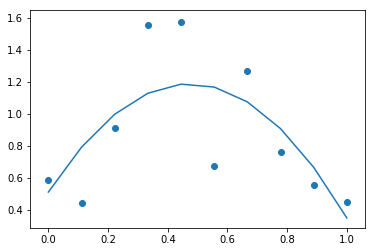

In [11]:
myF = np.poly1d(myW)
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.show()

The major issue with my code, is that my calculation of the derivative is... poor. If we instead use a simple explicit formula we should get sizable speed up.

In [24]:
w = [np.random.random() for x in range(3)] ## initializing randomly will give a slight boost
hf = np.poly1d(w)
h=hf(x_pts)
diff = h-y_pts

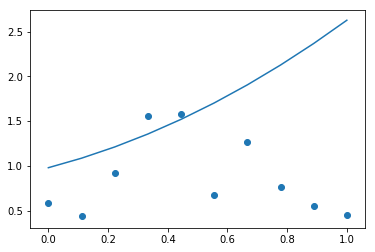

In [26]:
myF = np.poly1d(w)
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.show()

Alright I'm starting with a randomly initialized w vector. We're gonna try to get a better working update method by utilizing the Widrow-Hoff rule.

In [29]:
getError(y_pts,h)

12.073307940944451

In [42]:
nextW = []
for i in range(3):
    nextW.append(w[i]-0.002*sum(diff*x_pts**i)) ## My sign is flipped because the way I defined diff Phewww
    ## And it turns out, just straight up wrong because of how numply.polyd1d works... but it's fixed 

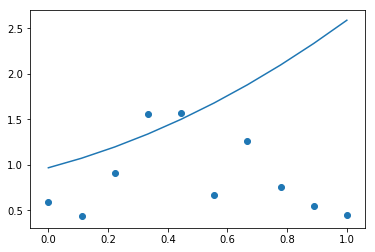

11.613672109310153

In [43]:
myF = np.poly1d(nextW)
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.show()
getError(y_pts,myF(x_pts))

Alright and putting it all together again!

In [184]:
def fitItLMS(x_pts,y_pts,terms,alpha): ## No need for dw anymore Also fixed degree by changing it to terms
    w = [np.random.random() for x in range(terms)] ## random initialization will speed it up some
    while(True):
        hf = np.poly1d(w)
        h=hf(x_pts)
        diff = h-y_pts
        changes=[]
        for i in range(terms):
            changes.append(alpha*sum(diff*x_pts**(terms-i-1))) ## TIL that np.poly1d takes em in descending order wrt degree
            w[i]-=changes[i]
        if(max(np.abs(changes)) < 0.0001): ## Arbitrary threshold for accuracy
            return w

In [185]:
myW = fitItLMS(x_pts,y_pts,3,0.02)

In [186]:
myW

[-3.2335645620309408, 3.0622390657401239, 0.48408058890339345]

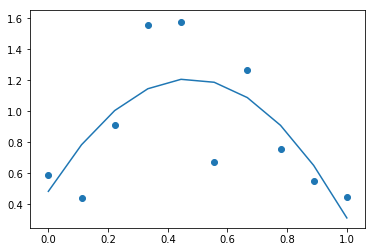

0.78487110641287972

In [187]:
myF = np.poly1d(myW)
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.show()
getError(y_pts,myF(x_pts))

In [190]:
myW = fitItLMS(x_pts,y_pts,12,0.002)

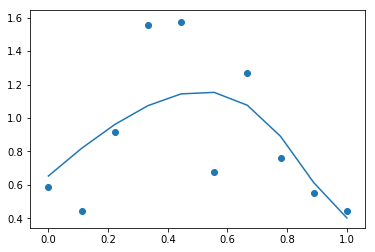

0.85362096841366131

In [191]:
myF = np.poly1d(myW)
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.show()
getError(y_pts,myF(x_pts))

In [192]:
myW

[0.59102070783217842,
 0.24413791883777591,
 -0.083364396614880751,
 -0.24099651196045452,
 0.14000698403191489,
 -0.34787383633976671,
 -0.54678444206271204,
 -0.44115175787186883,
 -0.42751764829112043,
 -0.70979637109639271,
 1.5713789910968483,
 0.65253358585534771]

It's not behaving how I'd expect it to considering that it should be way overfitting the model.